<a href="https://colab.research.google.com/github/jmichaelh/Intro-to-AI-with-Python/blob/main/Day_4/Final%20Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to AI Final Lab

We've covered many new subjects in this course. Now it's time to put your knowlege to the test. We'll be using a sample of a credit card transaction dataset from [kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download)

You are tasked with **classifying** transactions as fraudulent or not. Use multiple machine learning methods introduced in the course. Start with a Logistic Regression and then try to improve it by clustering your feature data and adding the cluster labels as a feature themself. Compare results and report which model is your best estimator.


Using `creditcard_transactions.csv` provided in the data folder, do the following:
> 1. Install & import all necessary tools into your notebook
> 1. Read in your dataset
> 1. Get an understanding of the distribution of each column (5 number summaries i.e. "describe" it!)
> 1. Visualize your data
> 1. Create a correlation matrix and write down any features that look like they could be correlated
> 1. Define your features, X, and your target, y
> 1. Split your data into a training set and a testing set
> 1. Build a logistic regression model
> 1. Evaluate your model's performance
> 1. Now, using k-means cluster your features and add the cluster labels to X as an additional feature
> 1. Re-run logistic regression with the new feature and see if your results improved in the evaluation step

**Bonus:** try either of the other 2 classifiers we showed in class, Neural Networks or KNN. If you're feeling especially bold feel free to try a new classifier, [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


#### Install & import all necessary tools into your notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans


#### Read in your dataset

In [72]:
ccData =  pd.read_csv('creditcard_transactions.csv', index_col=0)
ccData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Get an understanding of the distribution of each column (5 number summaries i.e. "describe" it!)

In [74]:
ccData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_fraud
count,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,...,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000
mean,12686.065095,-0.642974,0.569495,0.220561,0.631690,-0.320710,0.004687,-0.551137,-0.011555,0.512263,...,0.013627,-0.138176,-0.033452,0.011604,0.083246,0.102048,0.018572,0.008176,68.455297,0.089585
std,26055.489495,2.807890,2.016750,3.270259,2.006389,2.150015,1.429123,2.843758,2.365765,1.634945,...,1.464453,0.751843,0.662545,0.588650,0.468719,0.555655,0.566756,0.301519,192.160290,0.285599
min,0.000000,-30.552380,-34.607649,-31.103685,-4.657545,-32.092129,-23.496714,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2280.000000,-1.164620,-0.175690,0.194241,-0.511860,-0.720381,-0.706386,-0.631822,-0.191531,-0.152404,...,-0.264606,-0.547976,-0.183158,-0.339867,-0.170201,-0.321932,-0.083672,-0.017776,4.950000,0.000000
50%,5528.000000,-0.421759,0.360489,0.844430,0.331800,-0.185615,-0.199620,-0.110602,0.027313,0.697720,...,-0.107382,-0.125568,-0.046748,0.070986,0.119095,0.039410,0.001571,0.017469,15.950000,0.000000
75%,11052.000000,1.134803,1.045182,1.534593,1.352856,0.366833,0.454733,0.442239,0.334719,1.452414,...,0.075357,0.265470,0.088654,0.404543,0.362891,0.462468,0.159762,0.091507,53.927500,0.000000
max,170348.000000,2.132386,22.057729,4.101716,12.114672,34.099309,21.393069,34.303177,20.007208,10.392889,...,27.202839,8.361985,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


#### Visualize your data

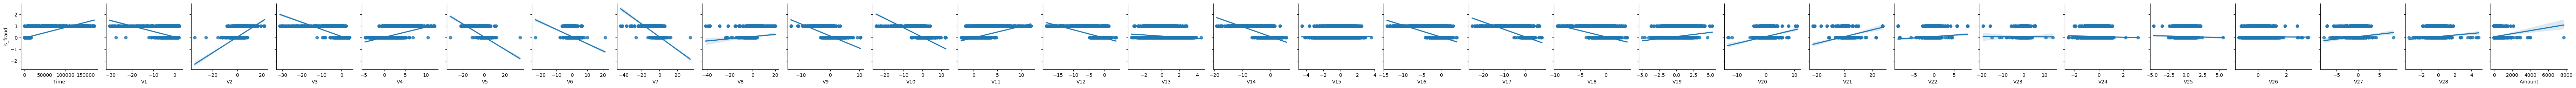

In [79]:
feature_cols - ccData.columns.drop('is_fraud')
sns.pairplot(ccData, x_vars=feature_cols, y_vars='is_fraud', kind='reg')

#### Create a correlation matrix and write down any features that look like they could be correlated

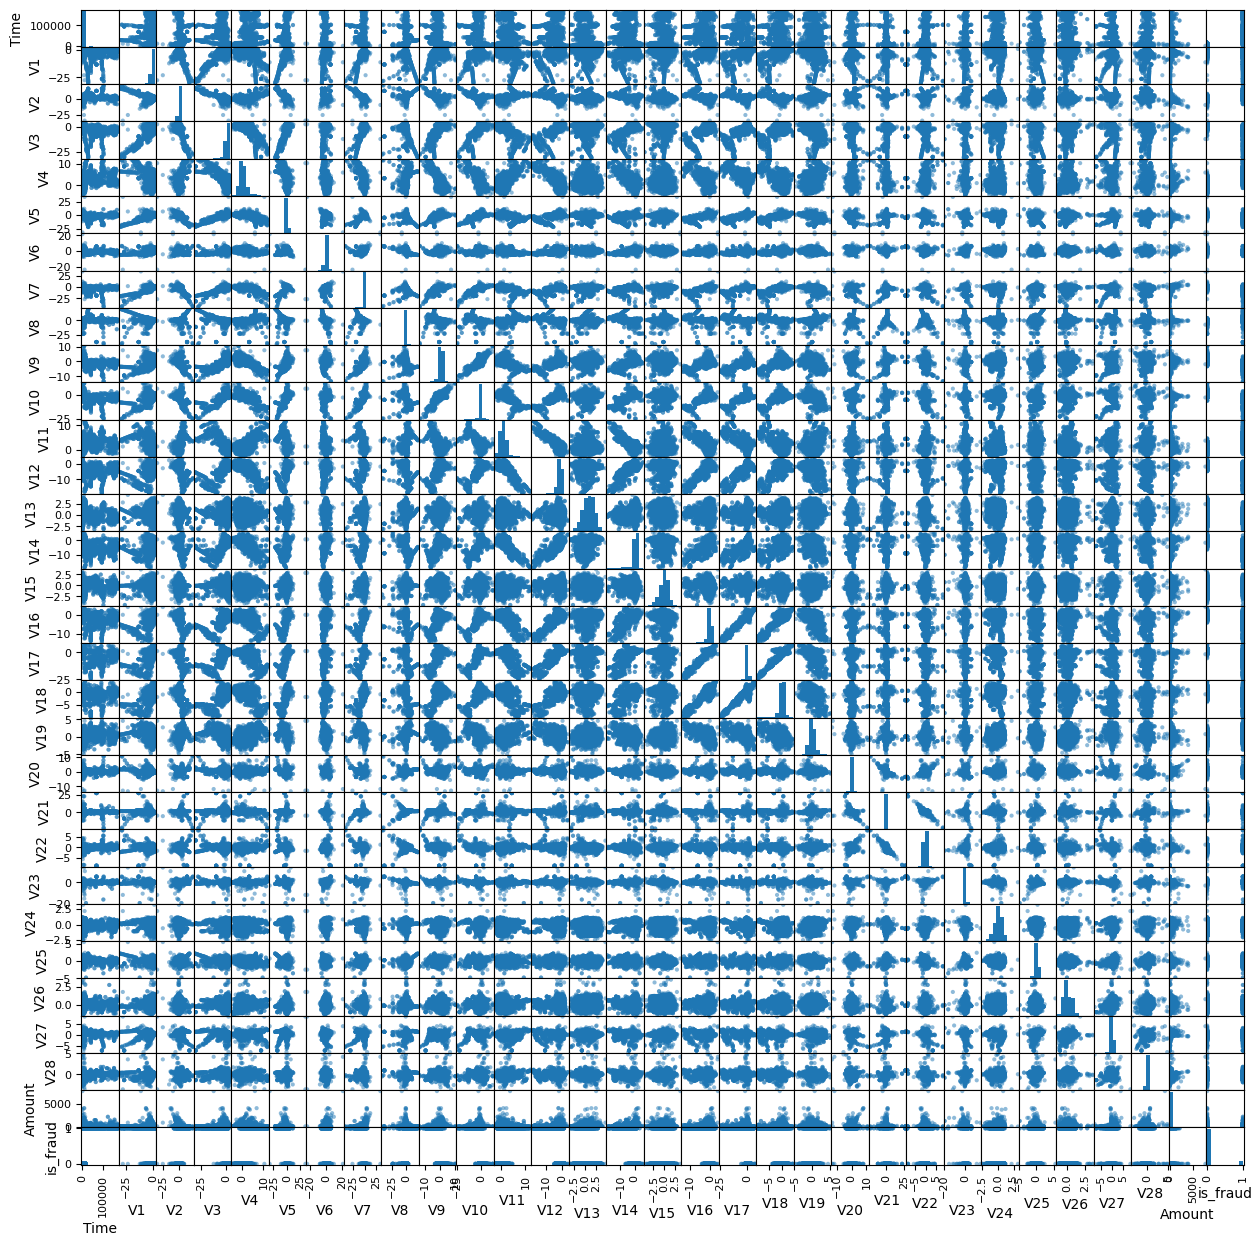

In [80]:
grr = pd.plotting.scatter_matrix(ccData, figsize=(15, 15), alpha=.07)

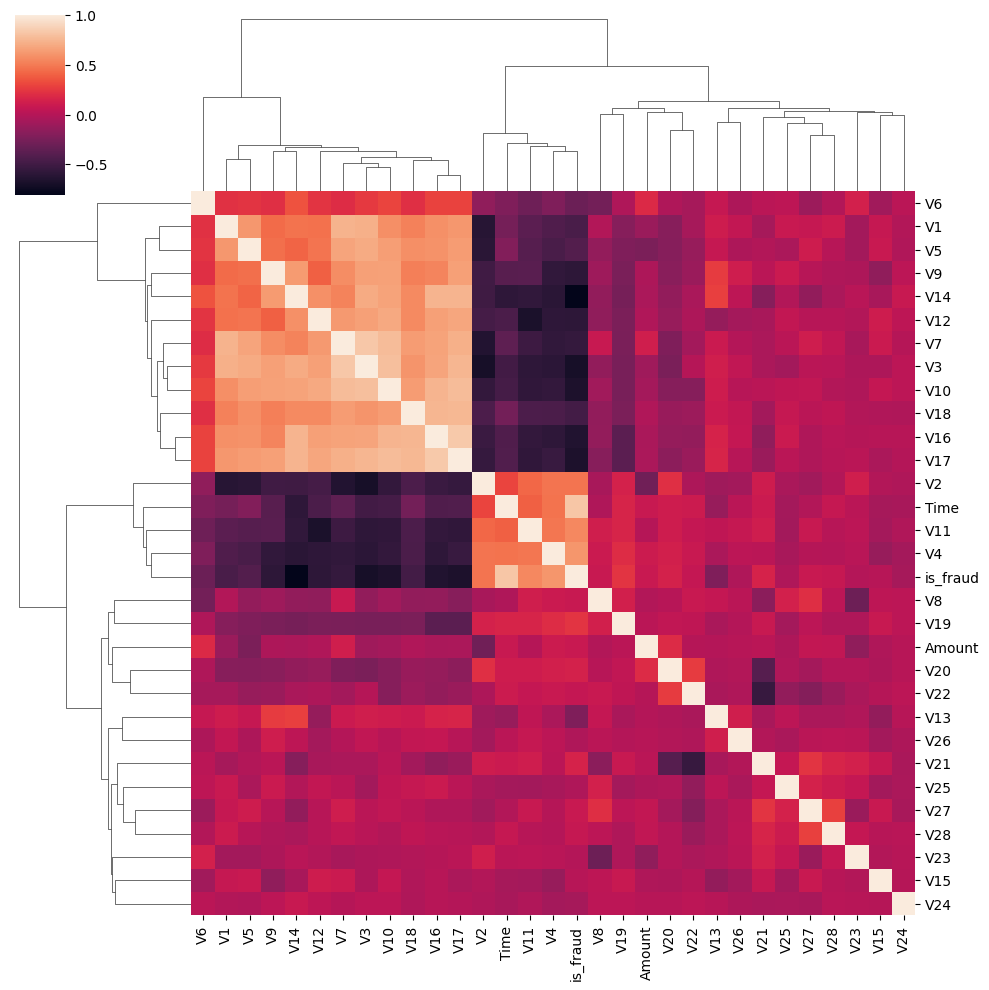

In [77]:
sns.clustermap(ccData.corr())
}

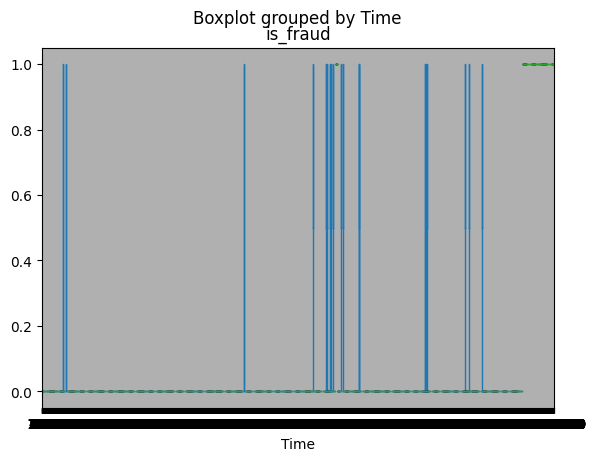

In [82]:
ccData.boxplot(column ='is_fraud', by='Time');

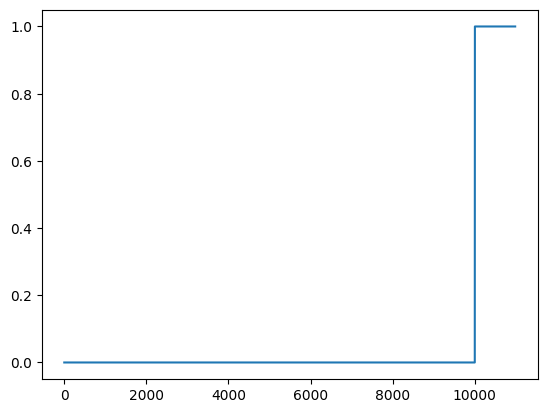

In [83]:
ccData.is_fraud.plot();

#### Define your features, X, and your target, y

In [84]:
feature_cols = ccData.columns.drop('is_fraud')
X = ccData[feature_cols]
y = ccData['is_fraud']

#### Split your data into a training set and a testing set

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build a logistic regression model

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.intercept_)
print(lr.coef_)

0.007565011339901659
[ 5.73320358e-06 -5.34482020e-03 -4.35956682e-03 -4.14097550e-03
  8.23048036e-03 -7.07172295e-03  2.04626524e-03  4.26709078e-03
 -1.46115945e-03 -7.83377446e-03 -6.95891579e-03  8.17859647e-03
 -2.53533441e-03 -1.02374322e-02 -2.79892817e-02  7.40607273e-03
  1.60039651e-03 -4.53558675e-03 -1.15946753e-03 -1.13223995e-03
  2.59454397e-03  3.22760232e-03 -8.26717378e-03 -1.26144067e-02
  3.89588085e-04  8.33969325e-03 -1.08102624e-02  2.07223838e-02
  1.00275445e-02 -4.03066484e-05]


#### Evaluate your model's performance

In [91]:
list(zip(feature_cols, lr.coef_))

[('Time', 5.733203582978851e-06),
 ('V1', -0.005344820202777404),
 ('V2', -0.004359566822994507),
 ('V3', -0.00414097549514122),
 ('V4', 0.008230480358188807),
 ('V5', -0.007071722946436172),
 ('V6', 0.0020462652382303515),
 ('V7', 0.004267090777768602),
 ('V8', -0.0014611594542830316),
 ('V9', -0.00783377445522034),
 ('V10', -0.006958915785835319),
 ('V11', 0.008178596474353227),
 ('V12', -0.0025353344138628244),
 ('V13', -0.010237432201013376),
 ('V14', -0.027989281705716407),
 ('V15', 0.007406072730266676),
 ('V16', 0.0016003965123978876),
 ('V17', -0.004535586745005115),
 ('V18', -0.0011594675341199834),
 ('V19', -0.0011322399502501205),
 ('V20', 0.002594543973679296),
 ('V21', 0.003227602320519231),
 ('V22', -0.008267173779142427),
 ('V23', -0.012614406720419991),
 ('V24', 0.0003895880847070036),
 ('V25', 0.008339693247702396),
 ('V26', -0.010810262434383875),
 ('V27', 0.020722383834271284),
 ('V28', 0.010027544500000074),
 ('Amount', -4.03066483851966e-05)]

#### Now, using k-means cluster your features and add the cluster labels to X as an additional feature

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=1)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=30, random_state=1)

#### Re-run logistic regression with the new feature and see if your results improved in the evaluation step

In [101]:
kmeans.labels_

array([15, 15, 15, ..., 19, 19, 19], dtype=int32)

In [104]:
ccData['cluster'] = kmeans.labels_
ccData.sort_values('cluster').tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,is_fraud,cluster
10712,65936.0,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,...,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,101.50,1,29
10713,66037.0,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,0.768378,-1.547882,...,-0.243678,-0.194079,-0.172201,0.742237,0.127790,0.569731,0.291206,7.53,1,29
10703,63578.0,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18,1,29
10707,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00,1,29
10698,62059.0,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,...,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,6.62,1,29


In [106]:
ccData.cluster.value_counts()

cluster
15    1664
14    1586
0     1446
25    1175
26     828
12     757
24     717
18     680
7      628
3      597
16     104
11      90
10      60
28      56
2       54
1       50
9       48
17      46
20      46
27      44
8       42
4       40
13      38
29      36
6       34
23      34
5       26
19      22
21      20
22      16
Name: count, dtype: int64

In [109]:
kmeans.cluster_centers_

array([[ 1.94052075e+03, -4.36651010e-01,  3.94932066e-01,
         8.63714297e-01,  3.32205931e-02, -1.03530434e-01,
        -6.21980391e-03,  7.09663800e-02, -1.49941905e-01,
         6.82642742e-02,  4.27657018e-03,  8.09924612e-02,
         2.88079285e-01, -1.88608813e-01, -9.81033597e-02,
         2.22236233e-01, -1.36389211e-01, -7.54069830e-02,
        -1.09289908e-01,  3.05608487e-02,  6.91998933e-02,
         2.22033954e-02, -1.42632791e-01, -4.29417722e-02,
         2.88502672e-02,  7.23551128e-02,  2.66395911e-02,
         6.86083584e-02,  1.58604200e-02,  6.06103873e+01],
       [ 1.31447840e+05, -4.73596144e-01,  1.52790615e+00,
        -4.36322262e+00,  3.35270017e+00, -6.84156051e-02,
        -9.92271438e-01, -8.50800979e-01, -4.56289596e-01,
        -1.42325372e+00, -2.86051255e+00,  2.03828810e+00,
        -2.87257494e+00, -2.88960256e-01, -5.77681373e+00,
        -2.47579107e-01, -1.41864718e+00, -1.41701902e+00,
         4.00593977e-02,  1.88331913e-01,  2.45299205e-

In [111]:
ccData.groupby('cluster').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_fraud
cluster,,,,,,,,,,,,,,,,,,,,,
0,1938.609959,-0.438121,0.393676,0.862758,0.032316,-0.105974,-0.005474,0.073718,-0.150727,0.068859,...,0.022061,-0.142007,-0.042473,0.029628,0.073056,0.027066,0.068581,0.015989,61.179599,0.000000
1,131447.840000,-0.473596,1.527906,-4.363223,3.352700,-0.068416,-0.992271,-0.850801,-0.456290,-1.423254,...,0.609002,0.141944,-0.123312,0.024959,-0.146271,0.007163,0.227568,0.193100,237.114400,1.000000
2,57516.814815,-3.771623,1.095490,-3.910419,3.705660,-1.564767,-1.146749,-4.004842,0.258364,-2.245969,...,0.306849,0.104482,-0.205334,-0.221183,0.072237,-0.026877,0.602100,0.012660,143.074815,1.000000
3,12520.271357,-0.369988,0.383102,0.851595,0.596730,-0.156100,0.042504,-0.224513,-0.090275,1.350543,...,-0.003517,-0.169237,0.037886,0.022287,0.082477,0.310445,-0.034117,0.016495,63.554590,0.020101
4,102005.600000,-9.662600,7.930848,-11.680493,6.692489,-5.651732,-0.374764,-14.175062,-7.062638,-4.587735,...,-3.552362,1.989254,0.140332,-0.206064,-0.537075,-0.064784,-1.299821,-0.141722,38.099000,1.000000
5,160103.307692,-1.417332,2.056292,-5.290453,4.289432,0.297416,-2.117442,-2.146866,0.528552,-2.501656,...,0.451971,-0.022919,-0.019786,-0.409311,0.101909,0.102330,0.256125,0.069372,52.529231,1.000000
6,35199.882353,-2.555283,2.472165,-3.348002,3.933719,-2.123422,-1.150993,-4.017681,0.982038,-2.741165,...,1.091886,-0.191223,-0.276262,-0.082344,0.051081,0.195330,0.594890,0.132687,72.635294,1.000000
7,6320.573248,-0.483885,0.405998,1.017136,0.652153,-0.009593,0.280951,-0.133560,-0.137261,1.207571,...,-0.128612,-0.224864,-0.014612,-0.009095,0.061143,0.024075,-0.032646,0.009388,77.907994,0.003185
8,76441.666667,-2.082724,1.868181,-2.281231,2.137591,-1.253720,-1.060976,-1.868125,0.610608,-1.247586,...,0.246141,-0.086026,-0.282316,-0.021349,0.087442,-0.320278,-0.004510,0.275043,74.606190,1.000000


In [112]:
centers = ccData.groupby('cluster').mean()

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

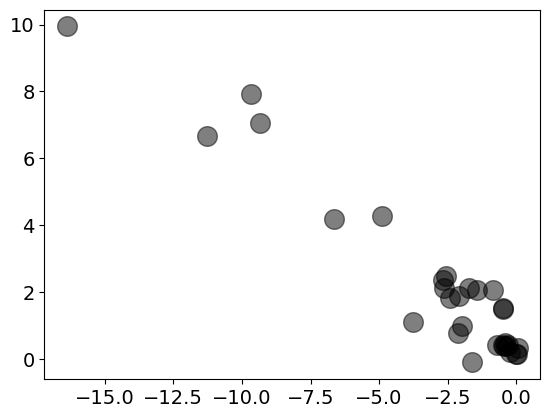

In [127]:
plt.scatter(centers.V1, centers.V2, c='black', s=200, alpha=0.5);

In [ ]:
pd.plotting.scatter_matrix(X, c=colors[ccData.cluster % len(colors)], figsize=(10,10), s=100);

**Bonus:** try either of the other 2 classifiers we showed in class, Neural Networks or KNN. If you're feeling especially bold feel free to try a new classifier, [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)